# Кастеризация данных. ***Sclearn***

Методы кластеризации в sclearn: https://scikit-learn.org/stable/modules/clustering.html



Метрики: https://habr.com/ru/articles/821547/, 
https://habr.com/ru/companies/yandex/articles/500742/


**Задача:** Подобрать методы кластризации для данных четырех типов:
1. нормально распределенные вокруг центров
2. в виде вложенных окружностей
3. в виде полумесяцев
4. с анизотропным распределением

Вычеслить метрики качества.

**Основные методы:**

1. K-means
2. Affinity Propagation
3. Mean Shift
4. Spectral clustering
5. Hierarchical clustering
6. DBSCAN
7. HDBSCAN
8. OPTICS
9. BIRCH


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import *
from sklearn.metrics import *

## Generate make_blobs, _circles,  _moons sample data and _aniso

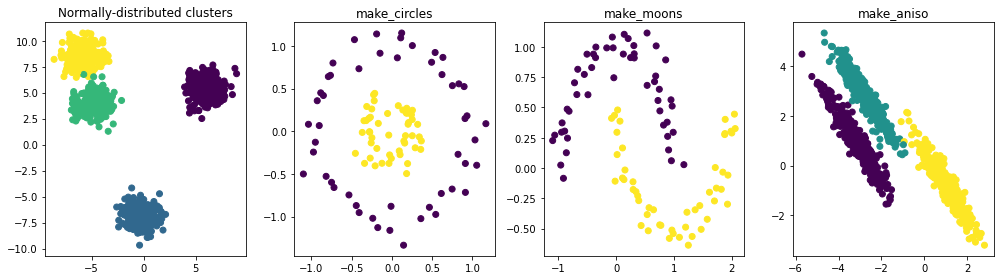

In [5]:
n_samples = 1000

X_blobs, y_blobs = make_blobs(n_samples=n_samples, 
                  n_features=2,
                  centers=4, 
                  cluster_std=0.9, 
                  )

X_circles, y_circles = make_circles(noise=0.1, factor=0.3, random_state=0)

X_moons, y_moons = make_moons(noise=0.1, random_state=0)

# Anisotropicly distributed data
random_state = 170
X, y_aniso = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

ax1.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
ax1.set_title("Normally-distributed clusters")

ax2.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles)
ax2.set_title("make_circles")

ax3.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
ax3.set_title("make_moons")

ax4.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_aniso)
ax4.set_title("make_aniso")

plt.tight_layout()
plt.show()

In [230]:
def metrics_clust(X, y, y_pred):
    
    ri = rand_score(y, y_pred)
    print(f'rand index: {ri}')

    ari = adjusted_rand_score(y, y_pred)
    print(f'adjusted rand index: {ari}')

    mi = mutual_info_score(y, y_pred)
    print(f'mutual index: {mi}')

    nmi = normalized_mutual_info_score(y, y_pred)
    print(f'normalized mutual index: {nmi}')

    ami = adjusted_mutual_info_score(y, y_pred)
    print(f'adjusted mutual index: {ami}')
    
    homogeneity = homogeneity_score(y, y_pred)
    print(f'homogeneity: {homogeneity}')
    
    completeness = completeness_score(y, y_pred)
    print(f'completeness: {completeness}')
    
    v_measure = v_measure_score(y, y_pred)
    print(f'v measure: {v_measure}')
    
    fmi = fowlkes_mallows_score(y, y_pred)
    print(f'Fowlkes-Mallows index: {fmi}')
    
    silhouette = silhouette_score(X, y_pred)
    print(f'silhouette: {silhouette}')

## K-means model

### Blobs

In [234]:
y_pred = KMeans(n_clusters=4).fit_predict(X_blobs)

metrics_clust(X_blobs, y_blobs, y_pred)

rand index: 0.9833413413413413
adjusted rand index: 0.9554877820649059
mutual index: 1.300572815300102
normalized mutual index: 0.9381663289657469
adjusted mutual index: 0.9379641083698211
homogeneity: 0.9381649754742273
completeness: 0.938167682461172
v measure: 0.938166328965747
Fowlkes-Mallows index: 0.9665824635320377
silhouette: 0.6305935412971848


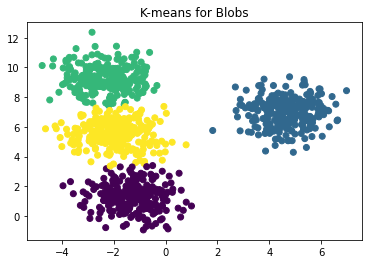

In [235]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred)
plt.title("K-means for Blobs")
plt.show()

### Circles

In [236]:
y_pred = KMeans(n_clusters=2).fit_predict(X_circles)

metrics_clust(X_circles, y_circles, y_pred)

rand index: 0.5022222222222222
adjusted rand index: 0.004927715954704174
mutual index: 0.007664497651709068
normalized mutual index: 0.011294479513216294
adjusted mutual index: 0.0038329116977951234
homogeneity: 0.011057532753025769
completeness: 0.01154180348721057
v measure: 0.011294479513216292
Fowlkes-Mallows index: 0.5117073820007964
silhouette: 0.29345767596021166


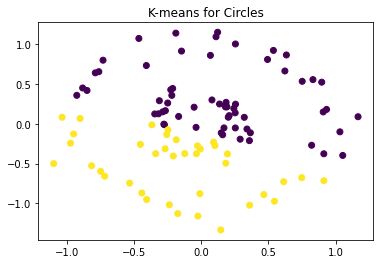

In [237]:
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred)
plt.title("K-means for Circles")
plt.show()

### Moons

In [238]:
y_pred = KMeans(n_clusters=2).fit_predict(X_moons)

metrics_clust(X_moons, y_moons, y_pred)

rand index: 0.6113131313131314
adjusted rand index: 0.2225977079047899
mutual index: 0.12105762671526299
normalized mutual index: 0.175053748528183
adjusted mutual index: 0.1689525185808174
homogeneity: 0.17464923772389707
completeness: 0.17546013748389053
v measure: 0.17505374852818298
Fowlkes-Mallows index: 0.6086281218782259
silhouette: 0.4649547921011724


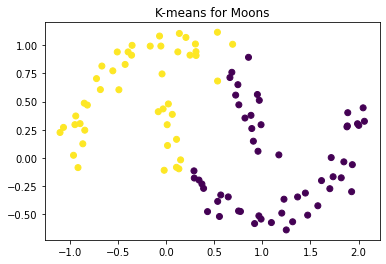

In [239]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred)
plt.title("K-means for Moons")
plt.show()

### Aniso

In [6]:
...

Ellipsis

Выводы: ....

## MeanShift model

### Blobs

In [240]:
bandwidth = estimate_bandwidth(X_blobs, quantile=0.2, n_samples=n_samples) # Область поиска.

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
history = ms.fit(X_blobs)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


In [241]:
X_my = np.array([-5, -10]).reshape(1, -1)

y_pred_my = ms.predict(X_my)
y_pred = ms.predict(X_blobs)

In [242]:
metrics_clust(X_blobs, y_blobs, y_pred)

rand index: 0.9833613613613613
adjusted rand index: 0.9555412758973
mutual index: 1.300593307849181
normalized mutual index: 0.938181111236539
adjusted mutual index: 0.9379789389844938
homogeneity: 0.938179757723693
completeness: 0.9381824647532905
v measure: 0.9381811112365391
Fowlkes-Mallows index: 0.9666226240133212
silhouette: 0.6304009246050298


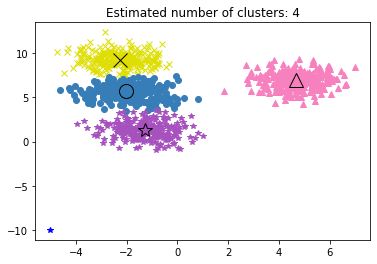

In [243]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", "#a751bf", "#e101bb"]
markers = ["x", "o", "^", "*", "v"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_blobs[my_members, 0], X_blobs[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )

plt.plot(X_my[0][0], X_my[0][1], markers[y_pred_my[0]], color='b')
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Circles

In [231]:
...

Ellipsis

### Moons

In [232]:
...

Ellipsis

## Spectral Clustering

In [247]:
spectral = SpectralClustering(
        n_clusters=2,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=0,
    )
spectral.fit(X_moons)

In [250]:
y_pred = spectral.fit_predict(X_moons)

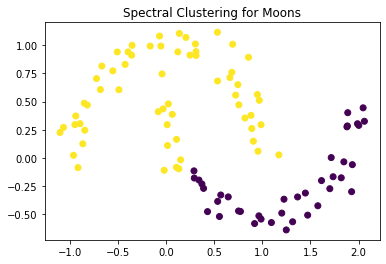

In [251]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred)
plt.title("Spectral Clustering for Moons")
plt.show()